In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import torchvision
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import sys

def display_image_in_actual_size(img):
    
    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, *_ = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

67.5 1.5489798
58.0 0.08726646
-367.0 3.080506
389.0 1.579523


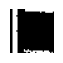

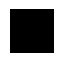

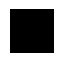

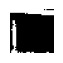

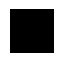

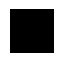

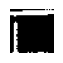

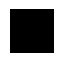

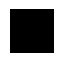

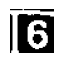

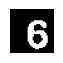

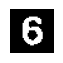

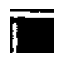

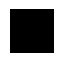

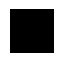

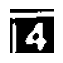

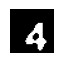

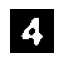

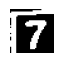

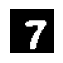

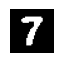

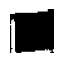

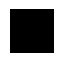

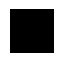

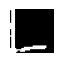

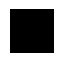

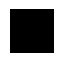

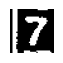

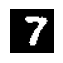

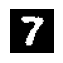

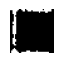

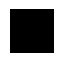

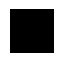

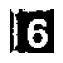

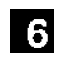

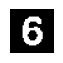

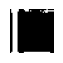

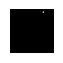

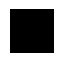

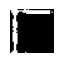

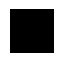

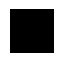

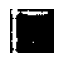

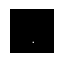

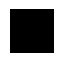

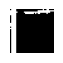

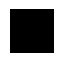

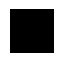

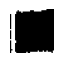

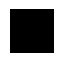

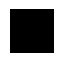

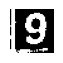

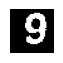

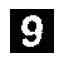

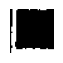

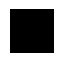

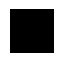

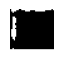

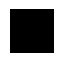

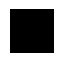

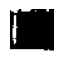

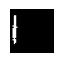

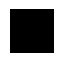

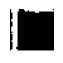

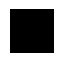

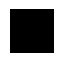

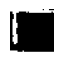

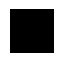

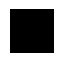

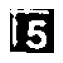

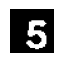

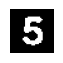

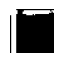

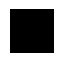

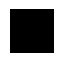

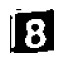

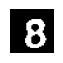

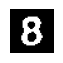

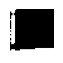

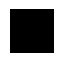

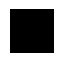

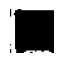

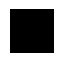

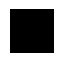

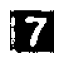

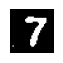

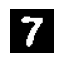

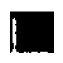

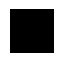

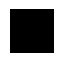

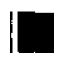

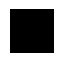

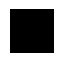

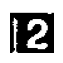

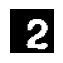

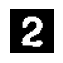

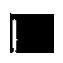

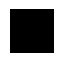

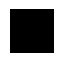

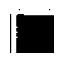

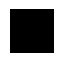

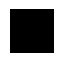

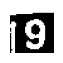

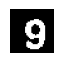

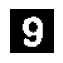

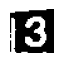

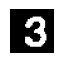

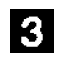

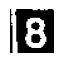

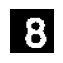

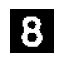

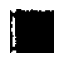

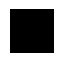

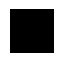

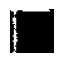

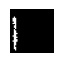

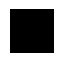

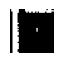

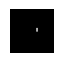

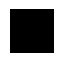

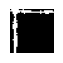

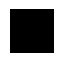

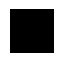

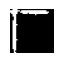

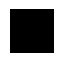

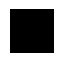

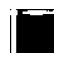

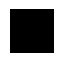

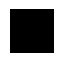

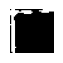

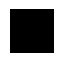

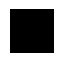

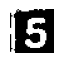

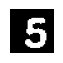

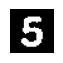

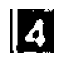

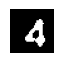

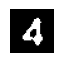

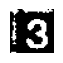

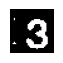

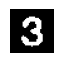

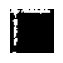

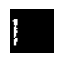

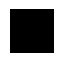

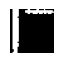

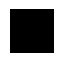

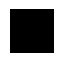

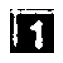

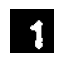

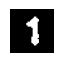

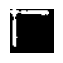

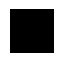

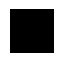

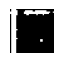

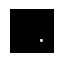

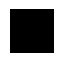

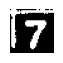

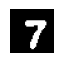

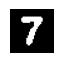

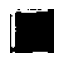

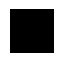

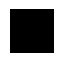

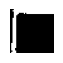

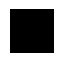

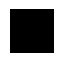

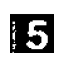

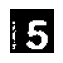

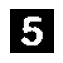

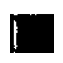

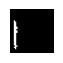

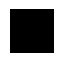

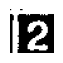

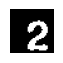

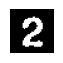

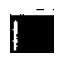

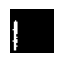

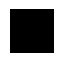

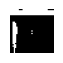

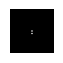

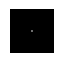

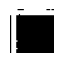

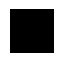

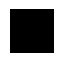

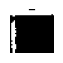

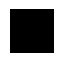

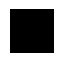

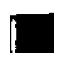

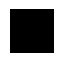

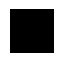

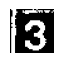

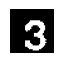

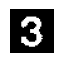

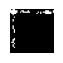

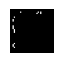

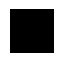

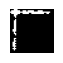

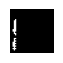

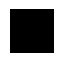

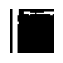

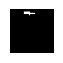

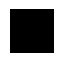

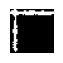

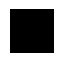

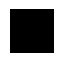

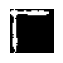

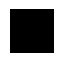

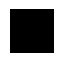

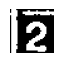

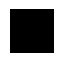

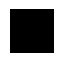

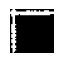

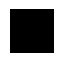

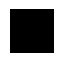

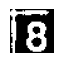

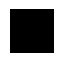

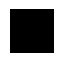

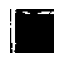

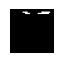

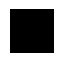

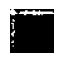

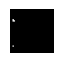

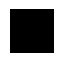

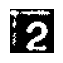

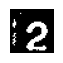

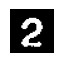

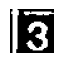

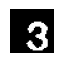

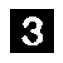

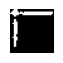

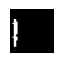

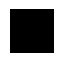

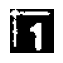

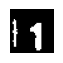

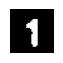

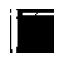

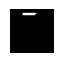

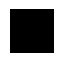

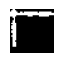

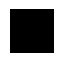

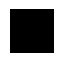

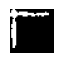

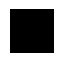

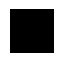

torch.Size([1000, 1, 28, 28])


/var/folders/7g/qgw0d2v55szdww4y4_lzltt80000gn/T/ipykernel_16732/2355389031.py:419: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


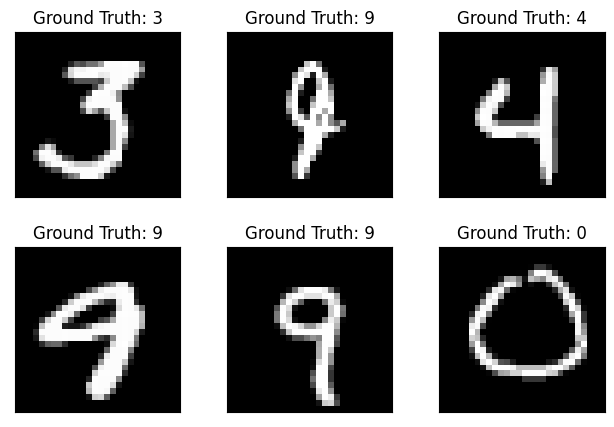

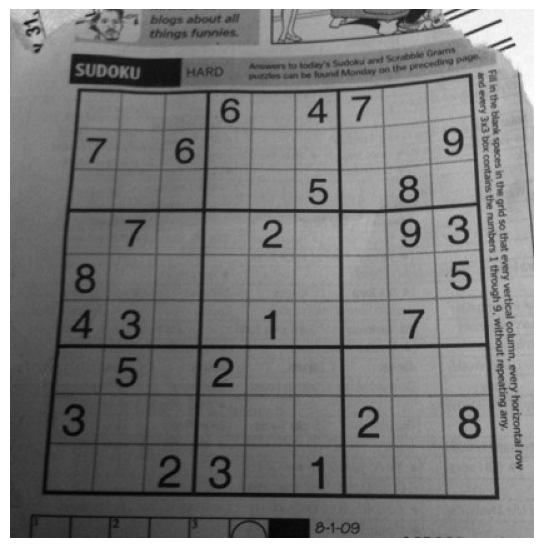

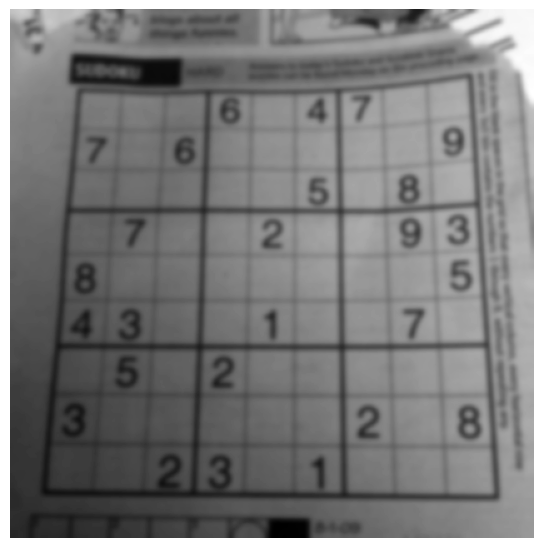

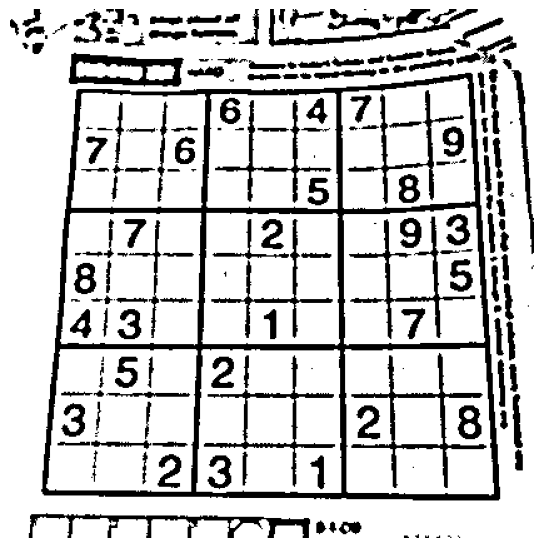

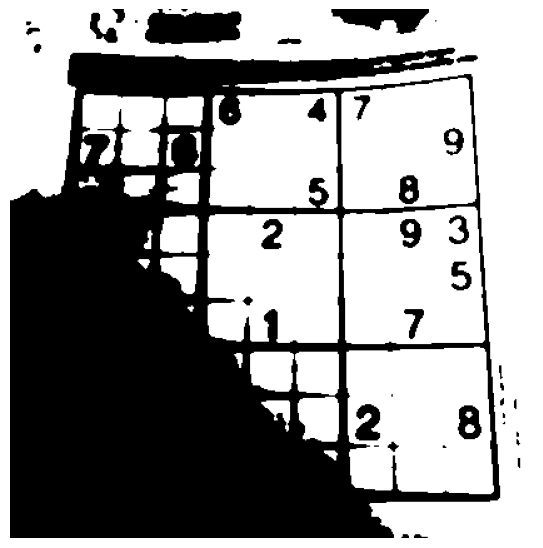

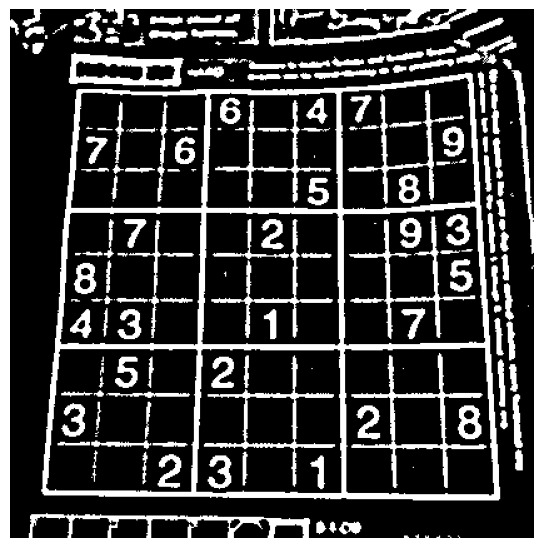

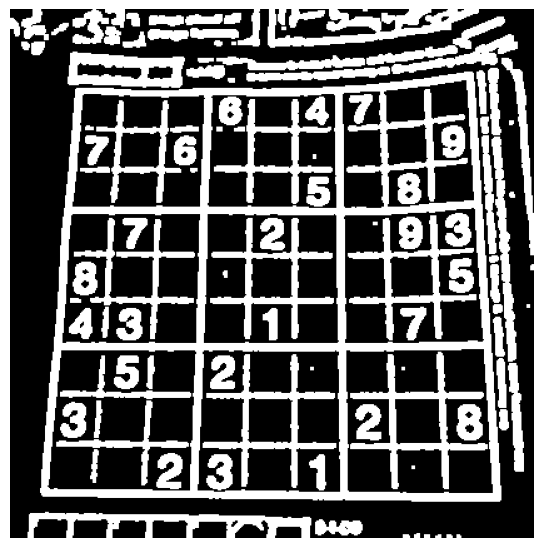

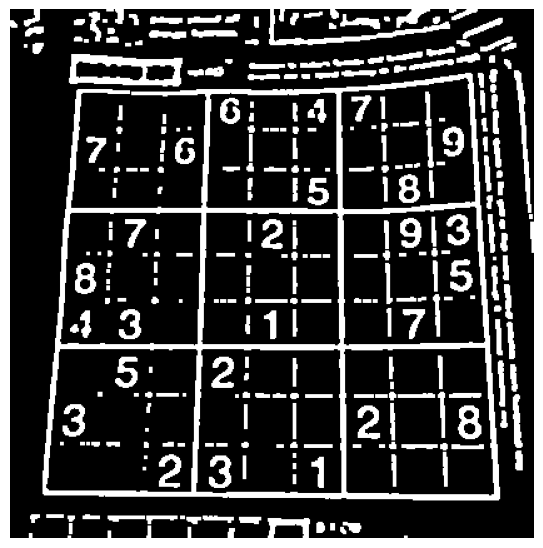

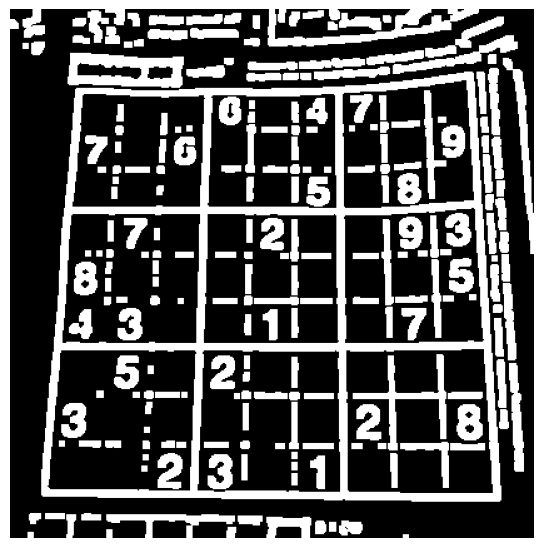

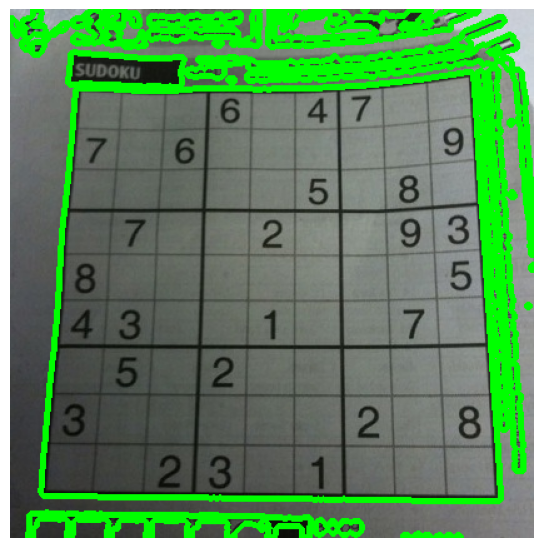

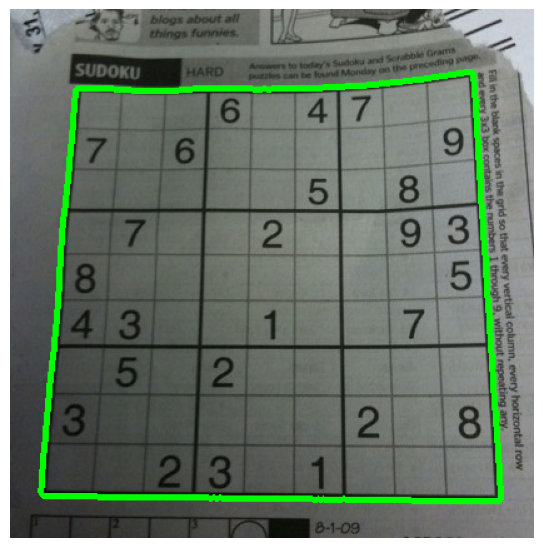

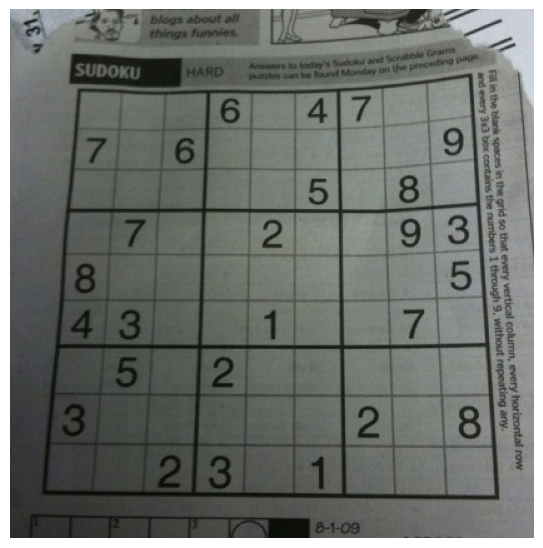

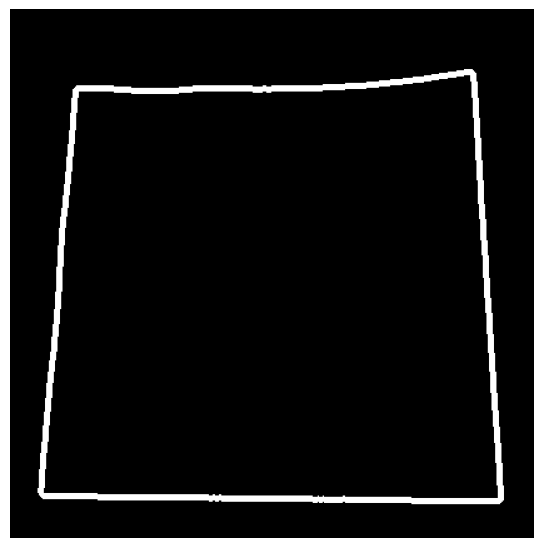

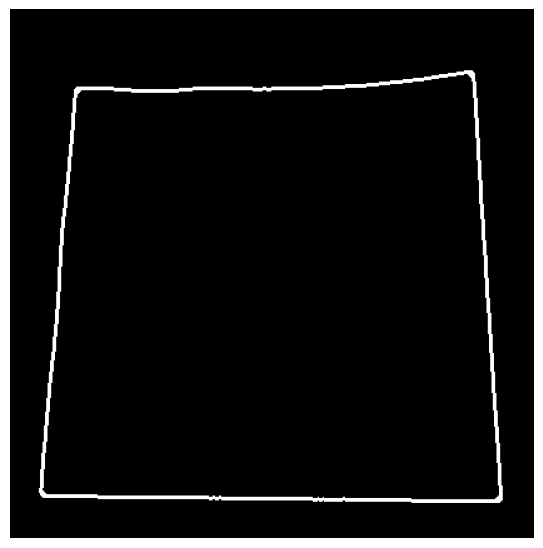

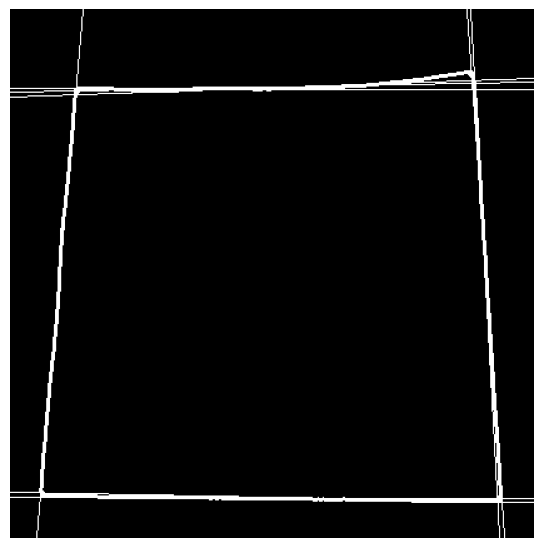

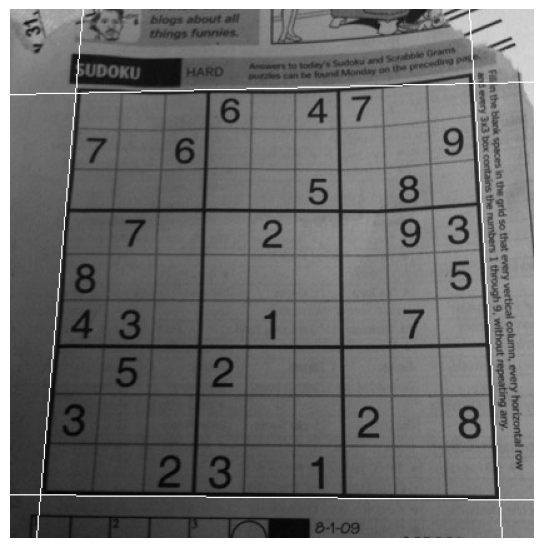

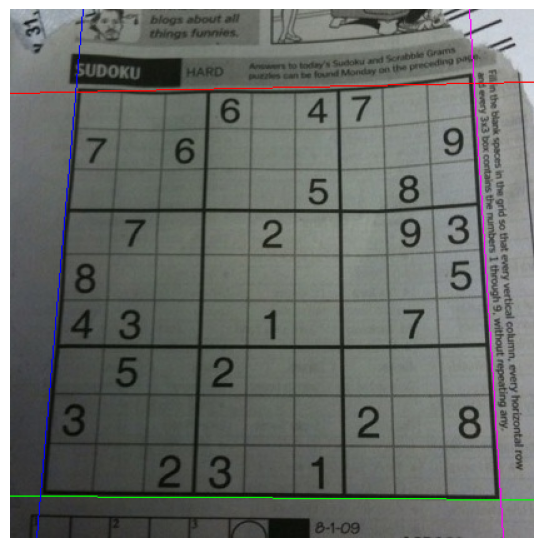

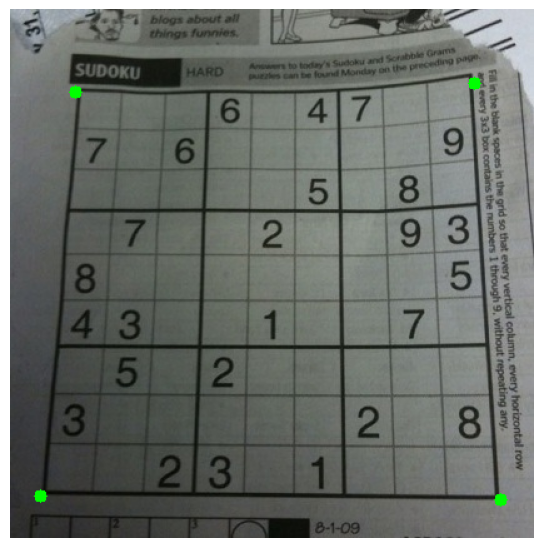

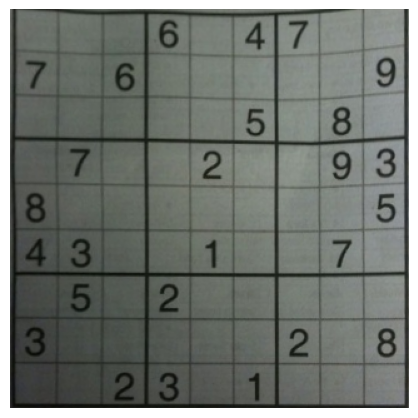

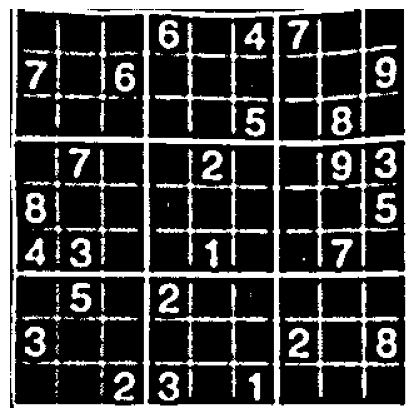

RESIZED SHAPE:  torch.Size([81, 1, 28, 28]) torch.float32 tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0

/var/folders/7g/qgw0d2v55szdww4y4_lzltt80000gn/T/ipykernel_16732/2355389031.py:437: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


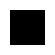

cell:  tensor([8])


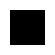

cell:  tensor([1])


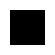

cell:  tensor([8])


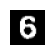

cell:  tensor([6])


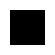

cell:  tensor([8])


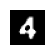

cell:  tensor([4])


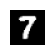

cell:  tensor([2])


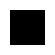

cell:  tensor([1])


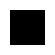

cell:  tensor([8])


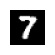

cell:  tensor([1])


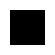

cell:  tensor([8])


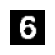

cell:  tensor([6])


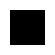

cell:  tensor([8])


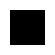

cell:  tensor([8])


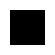

cell:  tensor([8])


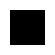

cell:  tensor([1])


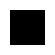

cell:  tensor([8])


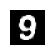

cell:  tensor([9])


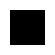

cell:  tensor([8])


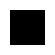

cell:  tensor([8])


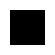

cell:  tensor([1])


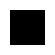

cell:  tensor([8])


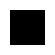

cell:  tensor([1])


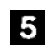

cell:  tensor([5])


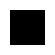

cell:  tensor([1])


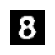

cell:  tensor([8])


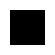

cell:  tensor([8])


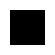

cell:  tensor([1])


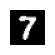

cell:  tensor([7])


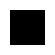

cell:  tensor([1])


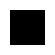

cell:  tensor([8])


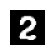

cell:  tensor([2])


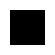

cell:  tensor([1])


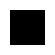

cell:  tensor([8])


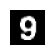

cell:  tensor([8])


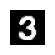

cell:  tensor([3])


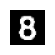

cell:  tensor([8])


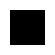

cell:  tensor([8])


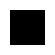

cell:  tensor([8])


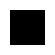

cell:  tensor([8])


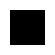

cell:  tensor([8])


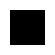

cell:  tensor([8])


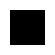

cell:  tensor([8])


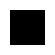

cell:  tensor([8])


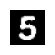

cell:  tensor([5])


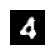

cell:  tensor([4])


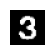

cell:  tensor([3])


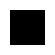

cell:  tensor([8])


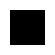

cell:  tensor([8])


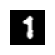

cell:  tensor([2])


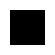

cell:  tensor([8])


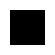

cell:  tensor([1])


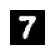

cell:  tensor([1])


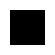

cell:  tensor([8])


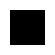

cell:  tensor([1])


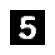

cell:  tensor([5])


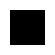

cell:  tensor([8])


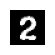

cell:  tensor([2])


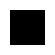

cell:  tensor([8])


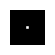

cell:  tensor([9])


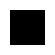

cell:  tensor([8])


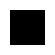

cell:  tensor([1])


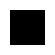

cell:  tensor([1])


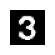

cell:  tensor([3])


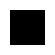

cell:  tensor([8])


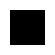

cell:  tensor([8])


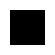

cell:  tensor([8])


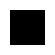

cell:  tensor([8])


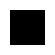

cell:  tensor([8])


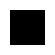

cell:  tensor([1])


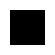

cell:  tensor([1])


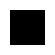

cell:  tensor([8])


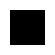

cell:  tensor([1])


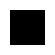

cell:  tensor([8])


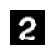

cell:  tensor([8])


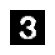

cell:  tensor([3])


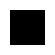

cell:  tensor([8])


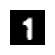

cell:  tensor([1])


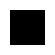

cell:  tensor([0])


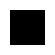

cell:  tensor([8])


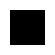

cell:  tensor([1])


In [59]:
#img = cv2.imread('v2_train/image17.jpg')
img = cv2.imread('testimg.jpg')
heightImg = img.shape[0]
widthImg = img.shape[1]
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
#img = cv2.imread('testimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
# div = np.float32(gray)/(close)
# res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))

blur = cv2.GaussianBlur(gray, (11,11), 0)
#median = cv2.medianBlur(gray,3)
#blur = cv2.bilateralFilter(gray,9,75,75)


thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)

_, otsuThresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

notthresh = cv2.bitwise_not(thresh)

#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], np.uint8)
notthreshCopy = notthresh.copy()
dilated2 = cv2.dilate(notthreshCopy, kernel, iterations=1)
opening = cv2.morphologyEx(notthresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(opening, kernel, iterations=1)

#flooded = cv2.floodFill(dilated, None, (0,0), 128)

imgContours = img.copy() 
imgBigContour = img.copy()
imgBigContourApprox = img.copy()
imgJustBigContour = np.zeros((heightImg, widthImg, 1), np.uint8)
contours, hierarchy = cv2.findContours(dilated2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgContours = cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 3)

contoursSorted = sorted(contours, key=cv2.contourArea, reverse=True)
largestContour = contoursSorted[0]
imgBigContour = cv2.drawContours(imgBigContour, [largestContour], -1, (0, 255, 0), 3)
imgJustBigContour = cv2.drawContours(imgJustBigContour, [largestContour], -1, 255, 3)

#epsilon = 0.001*cv2.arcLength(largestContour,True)
#approx = cv2.approxPolyDP(largestContour,epsilon,True)

#x,y,w,h = cv2.boundingRect(largestContour)
#imgBigContourApprox = cv2.rectangle(imgBigContourApprox,(x,y),(x+w,y+h),(0,255,0),2)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
grid = cv2.dilate(imgJustBigContour, kernel, iterations=2)
grid = cv2.erode(grid, kernel, iterations=3)

lines = cv2.HoughLines(grid, 1, np.pi / 180, 200)

gridcopy = grid.copy()
height, width = np.shape(grid)
if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopy, pt1, pt2, 255)

#imgBigContourApprox = cv2.drawContours(imgBigContourApprox, [approx], -1, (0, 255, 0), 3)
# if len(approx) == 4:
#     print("good")
# else:
#     print("Cannot find grid")

for current in lines:
    if current[0][0] == 0.0 and current[0][1] == -100.0:
        continue
    p1 = current[0][0]
    theta1 = current[0][1]
    pt1current = [None, None]
    pt2current = [None, None]
    #If the line is almost horizontal
    if theta1 > np.pi * 45 / 180 and theta1 < np.pi * 135 / 180:
        pt1current[0] = 0
        pt1current[1] = p1 / np.sin(theta1)
        pt2current[0] = width
        pt2current[1] = -pt2current[0] / np.tan(theta1) + p1 / np.sin(theta1)
    #If the line is almost vertical
    else:
        pt1current[1] = 0
        pt1current[0] = p1 / np.cos(theta1)
        pt2current[1] = height
        pt2current[0] = -pt2current[1] * np.tan(theta1) + p1 / np.cos(theta1)
    #Now to fuse lines
    for pos in lines:
        #if pos[0].all() == current[0].all():
        if (pos[0] == current[0]).all():
            continue
        #print("pos - curr",pos[0][0], current[0][0], "=", abs(pos[0][0] - current[0][0]), abs(pos[0][0] - current[0][0])<20000,  "   angle", pos[0][1], current[0][1], "= ", abs(pos[0][1] - current[0][1]), abs(pos[0][1] - current[0][1]) < np.pi * 170/180)
        if abs(pos[0][0] - current[0][0]) < 20 and abs(pos[0][1] - current[0][1]) < np.pi * 10 / 180:
            p = pos[0][0]
            theta = pos[0][1]
            
            pt1 = [None, None]
            pt2 = [None, None]
            # If the line is almost horizontal
            if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
                pt1[0] = 0
                pt1[1] = p / np.sin(theta)
                pt2[0] = width
                pt2[1] = -pt2[0] / np.tan(theta) + p / np.sin(theta)
            # If the line is almost vertical
            else:
                pt1[1] = 0
                pt1[0] = p / np.cos(theta)
                pt2[1] = height
                pt2[0] = -pt2[1] * np.tan(theta) + p / np.cos(theta)
            #If the endpoints are close to each other, merge the lines
            if (pt1[0] - pt1current[0])**2 + (pt1[1] - pt1current[1])**2 < 64**2 and (pt2[0] - pt2current[0])**2 + (pt2[1] - pt2current[1])**2 < 64**2:
                current[0][0] = (current[0][0] + pos[0][0]) / 2
                current[0][1] = (current[0][1] + pos[0][1]) / 2
                pos[0][0] = 0
                pos[0][1] = -100
                

#print("finish lines", lines)
filteredLines = np.ndarray((0, 1, 2), np.float32)
for current in lines:
    if (current[0][0] is None and current[0][1] is None) or (np.isnan(current[0][0]) and np.isnan(current[0][1])) or (current[0][0] == 0.0 and current[0][1] == -100.0):
        #print("continue")
        continue
    else:
        #print("append", current)
        filteredLines = np.append(current, filteredLines)

#print("filteredLines", np.shape(filteredLines), len(filteredLines))
filteredLines = np.reshape(filteredLines, (len(filteredLines)//2, 1, 2))
gridcopyMerged = gray.copy()

height, width = np.shape(grid)
if filteredLines is not None:
    for i in range(len(filteredLines)):
        rho = filteredLines[i][0][0]
        theta = filteredLines[i][0][1]
        print(rho, theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(gridcopyMerged, pt1, pt2, 255, thickness=1)


topedge = [[np.inf, np.inf]]
bottomedge = [[-np.inf, -np.inf]]
leftedge = [[np.inf, np.inf]]
leftxintercept = np.inf
rightedge = [[-np.inf, -np.inf]]
rightxintercept = 0
for i in range(len(filteredLines)):
    current = filteredLines[i][0]
    p = current[0]
    theta = current[1]
    xIntercept = p * np.cos(theta)

    #If the line is nearly vertical
    if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
        if p < topedge[0][0]:
            topedge[0] = current[:]
        if p > bottomedge[0][0]:
            bottomedge[0] = current[:]

    #If the line is nearly horizontal
    else:
        if xIntercept > rightxintercept:
            rightedge[0] = current[:]
            rightxintercept = xIntercept
        if xIntercept <= leftxintercept:
            leftedge[0] = current[:]
            leftxintercept = xIntercept
            
def drawLine(line, img, color=255):
    height, width, *_ = np.shape(img)
    if line[0][1] != 0:
        m = -1 / np.tan(line[0][1])
        c = line[0][0] / np.sin(line[0][1])
        cv2.line(img, (0, int(c)), (width, int(m * width + c)), color)
    else:
        cv2.line(img, (line[0][0], 0), (line[0][0], height), color)
    return img

fourLines = img.copy()
fourLines = drawLine(topedge, fourLines, (255, 0, 0))
fourLines = drawLine(bottomedge, fourLines, (0, 255, 0))
fourLines = drawLine(leftedge, fourLines, (0, 0, 255))
fourLines = drawLine(rightedge, fourLines, (255, 0, 255))

def intersection(line1, line2, img):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    height, width, *_ = np.shape(img)
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    
    if (x0 < 0):
        x0 = max(0, y0 - int(np.round(rho1 / np.sin(theta1))))
    elif (x0 > width):
        x0 = min(width, y0 + int(np.round(rho1 / np.sin(theta1))))
    if (y0 < 0):
        y0 = max(0, x0 - int(np.round(rho1 / np.cos(theta1))))
    elif (y0 > height):
        y0 = min(height, x0 + int(np.round(rho1 / np.cos(theta1))))
    return [[x0, y0]]


ul = intersection(topedge, leftedge, img)
ur = intersection(topedge, rightedge, img)
bl = intersection(bottomedge, leftedge, img)
br = intersection(bottomedge, rightedge, img)

dots = img.copy()
dots = cv2.circle(dots, (ul[0][0], ul[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (ur[0][0], ur[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (bl[0][0], bl[0][1]), 5, (0,255,0), -1)
dots = cv2.circle(dots, (br[0][0], br[0][1]), 5, (0,255,0), -1)


box = np.array([ul, ur, bl, br], dtype=np.float32)

#distance between the points
widthBottom = np.sqrt(((br[0][0] - bl[0][0]) ** 2) + ((br[0][1] - bl[0][1]) ** 2))
widthTop = np.sqrt(((ur[0][0] - ul[0][0]) ** 2) + ((ur[0][1] - ul[0][1]) ** 2))
heightLeft = np.sqrt(((ul[0][0] - bl[0][0]) ** 2) + ((ul[0][1] - bl[0][1]) ** 2))
heightRight = np.sqrt(((ur[0][0] - br[0][0]) ** 2) + ((ur[0][1] - br[0][1]) ** 2))

minEdge = min(int(widthBottom), int(widthTop), int(heightLeft), int(heightRight))



imageBox = np.array([[0, 0],[minEdge, 0], [0, minEdge],[minEdge, minEdge]], dtype=np.float32)

warpMatrix = cv2.getPerspectiveTransform(box, imageBox)
warpedImgColored = cv2.warpPerspective(img, warpMatrix, (minEdge, minEdge))
#warpedImgBW = cv2.warpPerspective(dilated, warpMatrix, (widthImg, heightImg))
warpedImgBW = cv2.cvtColor(warpedImgColored, cv2.COLOR_BGR2GRAY)
warpedImgBW = cv2.GaussianBlur(warpedImgBW, (11, 11), 0)
warpedImgBW = cv2.adaptiveThreshold(warpedImgBW, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
warpedImgBW = cv2.bitwise_not(warpedImgBW)
kernel = np.ones((3,3), np.uint8)
#kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
#warpedImgBW = cv2.erode(warpedImgBW, kernel, iterations=1)
#warpedImgBW = cv2.dilate(warpedImgBW, kernel, iterations=1)

#cells = [np.hsplit(row, 9) for row in np.vsplit(warpedImgBW, 9)]

imgheight=int(warpedImgBW.shape[0])
imgwidth=int(warpedImgBW.shape[1])

y1 = 0
M = imgheight//9
N = imgwidth//9

i = 1
cells = []
for y in range(0,imgheight,M):
    for x in range(0, imgwidth, N):
        if x + (N) > imgwidth:
            #x1 = imgwidth
            x1 = x + N
            tiles = warpedImgBW[y:y1,x:x1]
            break
        else:
            x1 = x + N
        if y + (M) > imgheight:
            #y1 = imgheight
            y1 = y + M
            tiles = warpedImgBW[y:y1,x:x1] 
            break
        else:
            y1 = y + M
        tiles = warpedImgBW[y:y1,x:x1]
        cells.append(tiles)
        #display_image_in_actual_size(tiles)
cellsInit = np.array(cells)
cells = cellsInit.reshape(9,9, M,N)
cells_reshaped = cellsInit.reshape(81, 1, M,N)


for row in cells:
    for i, cell in enumerate(row):
        # kernel = np.ones((3,3), np.uint8)
        # kernel = np.array([[1,0,1],[0,0,0], [1,0,1]], np.uint8)
        # row[i] = cv2.erode(cell, kernel, iterations=1)
        # kernel = np.array([[0,1,0],[1,1,1], [0,1,0]], np.uint8)
        # row[i] = cv2.dilate(cell, kernel, iterations=1)
        cellHeight = cell.shape[0]
        cellWidth = cell.shape[1]
        display_image_in_actual_size(row[i])
        for y in range(M):
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,0), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (0,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (cellHeight-1,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,cellWidth-1), 0)
            
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,1), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (1,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (cellHeight-2,y), 0)
            _,row[i],_,_ = cv2.floodFill(row[i], None, (y,cellWidth-2), 0)
        display_image_in_actual_size(row[i])
        #np.set_printoptions(threshold=sys.maxsize)
        rowtop = None
        rowbottom = None
        colleft = None
        colright = None
        thresholdBottom = 50
        thresholdTop = 50
        thresholdLeft = 50
        thresholdRight = 50
        rows = cellHeight
        center = rows // 2
        for k in range(center, rows):
            if rowbottom is None:
                temp = row[i][k]
                if sum(temp) < thresholdBottom or k == rows-1:
                    rowbottom = k
            if rowtop is None:
                temp = row[i][rows-k-1]
                if sum(temp) < thresholdTop or k == rows-1:
                    rowtop = rows-k-1
            if colright is None:
                temp = row[i][:, k]
                if sum(temp) < thresholdRight or k == rows-1:
                    colright = k
            if colleft is None:
                temp = row[i][:, rows-k-1]
                if sum(temp) < thresholdLeft or k == rows-1:
                    colleft = rows-k-1
        # Centering the bounding box's contents
        newimg = np.zeros(np.shape(row[i]), dtype=np.uint8)
        startatX = (rows + colleft - colright)//2
        startatY = (rows - rowbottom + rowtop)//2
        for yy in range(startatY, (rows + rowbottom - rowtop)//2):
            for x in range(startatX, (rows - colleft + colright)//2):
                tempval = row[i][rowtop + yy - startatY][ colleft + x - startatX]
                newimg[yy][x] = tempval
        row[i] = newimg.copy()
        display_image_in_actual_size(newimg)

cells_reshaped = cells.reshape(81, 1, M,N)







        
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

print(example_data.shape)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig.show()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './results/model.pth')
            torch.save(optimizer.state_dict(), './results/optimizer.pth')
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            print("data shape: ", data.shape)
            print("data tyoe: ", data.dtype)
            print("output: ", output)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            print("pred: ", pred)
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
if os.path.isfile('./results/model.pth'):
    network.load_state_dict(torch.load('./results/model.pth'))
    optimizer.load_state_dict(torch.load('./results/optimizer.pth'))
else:
    test()
    for epoch in range(1, n_epochs + 1):
        train(epoch)
        test()

    fig = plt.figure()
    plt.plot(train_counter, train_losses, color='blue')
    plt.scatter(test_counter, test_losses, color='red')
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel('negative log likelihood loss')
    fig.show()

    with torch.no_grad():
        output = network(example_data)
        
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
        plt.title("Prediction: {}".format(
            output.data.max(1, keepdim=True)[1][i].item()))
        plt.xticks([])
        plt.yticks([])
    fig.show()

    continued_network = Net()
    continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                    momentum=momentum)

    network_state_dict = torch.load("./results/model.pth")
    continued_network.load_state_dict(network_state_dict)

    optimizer_state_dict = torch.load("./results/optimizer.pth")
    continued_optimizer.load_state_dict(optimizer_state_dict)

    for i in range(4,9):
        test_counter.append(i*len(train_loader.dataset))
        train(i)
        test()
        
    fig = plt.figure()
    plt.plot(train_counter, train_losses, color='blue')
    plt.scatter(test_counter, test_losses, color='red')
    plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel('negative log likelihood loss')
    fig.show()

display_image_in_actual_size(gray)
#display_image_in_actual_size(res)
display_image_in_actual_size(blur)
display_image_in_actual_size(thresh)
display_image_in_actual_size(otsuThresh)
display_image_in_actual_size(notthresh)
display_image_in_actual_size(dilated2)
display_image_in_actual_size(opening)
display_image_in_actual_size(dilated)
display_image_in_actual_size(imgContours)
display_image_in_actual_size(imgBigContour)
display_image_in_actual_size(imgBigContourApprox)
display_image_in_actual_size(imgJustBigContour)
display_image_in_actual_size(grid)
display_image_in_actual_size(gridcopy)
display_image_in_actual_size(gridcopyMerged)
display_image_in_actual_size(fourLines)
display_image_in_actual_size(dots)
display_image_in_actual_size(warpedImgColored)
display_image_in_actual_size(warpedImgBW)

cells_resized = np.array([])
for j, row in enumerate(cells_reshaped):
    for i, cell in enumerate(row):
        resized = cv2.resize(cells_reshaped[j][i], (28,28))
        cells_resized = np.append(cells_resized, resized)
        #display_image_in_actual_size(cells_reshaped[j][i])
        #display_image_in_actual_size(resized)
cells_resized = cells_resized.reshape(81, 1,28,28)
cells_resized = cells_resized.astype(np.double)
cells_resized = torch.tensor(cells_resized, dtype=torch.float32)
print("RESIZED SHAPE: ", cells_resized.shape, cells_resized.dtype, cells_resized)
        
print("CELLS SHAPE: ", cells.shape)
output = network(cells_resized)
pred = output.data.max(1, keepdim=True)[1]
print("full pred ", output.data.max(1, keepdim=True))
for i, cell in enumerate(cells_resized):
    display_image_in_actual_size(cells_resized[i][0])
    print("cell: ", pred[i])


#split image in 9x9 tiles
# tiles = [warpedImgBW[y:y+M,x:x+N] for y in range(0,imgheight,M) for x in range(0, imgwidth, N)]
# for tile in tiles:
#     display_image_in_actual_size(tile)

#display_image_in_actual_size(gray2)
#f, axarr = plt.subplots(4,1)
#axarr[0].imshow(gray, 800, cmap='gray')
#axarr[1].imshow(blur, cmap='gray')
#axarr[2].imshow(thresh, cmap='gray')
#axarr[3].imshow(otsuThresh, cmap='gray')
#for ax in axarr:
#    ax.axis('off')
#plt.xticks([]),plt.yticks([])